In [1]:
import numpy as np
import matplotlib.pyplot as plt
from coffea.util import load
import hist
from pocket_coffea.utils.plot_utils import stack_sum

In [2]:
filename = "/work/mmarcheg/PocketCoffea/output/sf_ele_trigger_semilep/semileptonic_triggerSF_2018_closuretest_withvariations_v01/output_{dataset}.coffea"
o = load(filename)
o.keys()

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'variables', 'columns', 'processing_metadata', 'trigger_efficiency', 'scale_genweight'])

In [3]:
o['variables'].keys()

dict_keys(['MuonGood_eta_1', 'MuonGood_pt_1', 'MuonGood_phi_1', 'ElectronGood_pt_1', 'ElectronGood_etaSC_1', 'ElectronGood_phi_1', 'ElectronGood_pt_1_finebinning', 'ElectronGood_etaSC_1_finebinning', 'ElectronGood_phi_1_finebinning', 'JetGood_eta_1', 'JetGood_pt_1', 'JetGood_phi_1', 'JetGood_btagDeepFlavB_1', 'JetGood_eta_2', 'JetGood_pt_2', 'JetGood_phi_2', 'JetGood_btagDeepFlavB_2', 'JetGood_eta_3', 'JetGood_pt_3', 'JetGood_phi_3', 'JetGood_btagDeepFlavB_3', 'JetGood_eta_4', 'JetGood_pt_4', 'JetGood_phi_4', 'JetGood_btagDeepFlavB_4', 'nMuons', 'nElectrons', 'nLeptons', 'nJets', 'nBJets', 'ht', 'electron_etaSC_pt_leading', 'electron_phi_pt_leading', 'electron_etaSC_phi_leading', 'electron_etaSC_pt_all', 'electron_phi_pt_all', 'electron_etaSC_phi_all'])

In [4]:
samples = o['variables']['electron_etaSC_phi_leading'].keys()
samples_mc = [s for s in samples if not 'DATA' in s]
samples_data = [s for s in samples if 'DATA' in s]
samples_mc

['TTToSemiLeptonic', 'TTTo2L2Nu']

In [5]:
histname = 'electron_etaSC_pt_leading'
#histname = 'electron_etaSC_phi_leading'
transpose = False

transpose = {}

dict_mc = {s : o['variables'][histname][s] for s in samples_mc}
dict_data = {s : o['variables'][histname][s] for s in samples_data}
stack_mc = hist.Stack.from_dict(dict_mc)
stack_data = hist.Stack.from_dict(dict_data)
stack_mc

Stack<('TTToSemiLeptonic', 'TTTo2L2Nu') of Hist(
  StrCategory(['Ele32_EleHT_fail', 'Ele32_EleHT_fail_highHT', 'Ele32_EleHT_fail_highHT_triggerSF', 'Ele32_EleHT_fail_lowHT', 'Ele32_EleHT_fail_lowHT_triggerSF', 'Ele32_EleHT_fail_triggerSF', 'Ele32_EleHT_pass', 'Ele32_EleHT_pass_highHT', 'Ele32_EleHT_pass_highHT_triggerSF', 'Ele32_EleHT_pass_lowHT', 'Ele32_EleHT_pass_lowHT_triggerSF', 'Ele32_EleHT_pass_triggerSF', 'inclusive', 'inclusive_triggerSF'], name='cat', label='Category'),
  StrCategory(['nominal', 'sf_ele_trigger_eraDown', 'sf_ele_trigger_eraUp', 'sf_ele_trigger_htDown', 'sf_ele_trigger_htUp', 'sf_ele_trigger_pileupDown', 'sf_ele_trigger_pileupUp', 'sf_ele_trigger_statDown', 'sf_ele_trigger_statUp'], name='variation', label='Variation'),
  StrCategory(['2018'], name='year', label='Year'),
  Variable([30, 35, 40, 50, 60, 70, 80, 90, 100, 130, 200, 500], name='ElectronGood.pt', label='Electron $p_{T}$ [GeV]'),
  Variable([-2.5, -2, -1.566, -1.4442, -1.2, -1, -0.8, -0.6, -0.4, -0.2

In [6]:
slice_mc = {'cat' : 'Ele32_EleHT_pass', 'variation' : 'nominal', 'year' : '2018'}
slice_data = {'cat' : 'Ele32_EleHT_pass', 'year' : '2018'}
h_mc = stack_sum(stack_mc)[slice_mc]
h_data = stack_sum(stack_data)[slice_data][sum,:,:]

slice_mc_passfail = slice_mc = {'cat' : ['Ele32_EleHT_pass', 'Ele32_EleHT_fail'], 'variation' : 'nominal', 'year' : '2018'}
slice_data_passfail = slice_mc = {'cat' : ['Ele32_EleHT_pass', 'Ele32_EleHT_fail'], 'year' : '2018'}
h_mc_passfail = stack_sum(stack_mc)[slice_mc_passfail][sum, :, :]
h_data_passfail = stack_sum(stack_data)[slice_data_passfail][sum, sum, :, :]

slice_mc_sfapplied = {'cat' : 'Ele32_EleHT_pass_triggerSF', 'variation' : 'nominal', 'year' : '2018'}
slice_data_sfapplied = {'cat' : 'Ele32_EleHT_pass_triggerSF', 'year' : '2018'}
h_mc_sfapplied = stack_sum(stack_mc)[slice_mc_sfapplied]
h_data_sfapplied = stack_sum(stack_data)[slice_data_sfapplied][sum,:,:]

h_data_sfapplied.axes.name

/work/mmarcheg/miniconda3/envs/pocket-coffea-blank/lib/python3.8/site-packages/hist/basehist.py:325: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


('ElectronGood.pt', 'ElectronGood.etaSC')

In [7]:
fontsize_map = 18

def plot_yields(h, title=None, rnd=0, transpose=False, vmin=70, vmax=200):
    if len(h.axes.name) != 2:
        raise NotImplemented
    fig, ax = plt.subplots(1,1, figsize=[16,10])
    axis_x = h.axes[0]
    axis_y = h.axes[1]
    values = h.values()[()]
    if transpose:
        axis_x = h.axes[1]
        axis_y = h.axes[0]
        y, x = np.meshgrid(axis_y.centers, axis_x.centers)
        fields = {
            axis_x.name : x.flatten(),
            axis_y.name : y.flatten(),
        }
        # We define a new histogram by swapping the order of the x,y axes
        # and filling it with the tranposed yields
        values = values.transpose()
        h = hist.Hist(axis_x, axis_y)
        h.fill(**fields, weight=values)
    h.plot2d(ax=ax, vmin=vmin, vmax=vmax);
    if title != None:
        ax.set_title(title)
    varname_x = axis_x.name
    varname_y = axis_y.name
    if varname_x == 'ElectronGood.pt':
        ax.set_xscale('log')
    for (i, x) in enumerate(axis_x.centers):
        if (x < ax.get_xlim()[0]) | (x > ax.get_xlim()[1]):
            continue
        if varname_x == "ElectronGood.etaSC":
            if (abs(x) > 1.4442) & (abs(x) < 1.5660):
                continue
        for (j, y) in enumerate(axis_y.centers):
            color = "w"
            if varname_y == "ElectronGood.etaSC":
                if (abs(y) > 1.4442) & (abs(y) < 1.5660):
                    continue
                else:
                    ax.text(
                        x,
                        y,
                        [f"{int(values[i][j])}" if rnd==0 else f"{round(values[i][j], rnd)}"][0],
                        color=color,
                        ha="center",
                        va="center",
                        fontsize=fontsize_map,
                        fontweight="bold",
                    )
            else:
                ax.text(
                    x,
                    y,
                    [f"{int(values[i][j])}" if rnd==0 else f"{round(values[i][j], rnd)}"][0],
                    color=color,
                    ha="center",
                    va="center",
                    fontsize=fontsize_map,
                    fontweight="bold",
                )
    return h
                
def plot_ratio(num, den, title=None, transpose=False, vmin=0.8, vmax=1.4):
    axis_x = num.axes[0]
    axis_y = num.axes[1]
    
    r = np.nan_to_num(num.values() / den.values(), 0)
    
    y, x = np.meshgrid(axis_y.centers, axis_x.centers)
    fields = {
        axis_x.name : x.flatten(),
        axis_y.name : y.flatten(),
    }
    ratio = hist.Hist(axis_x, axis_y)
    ratio.fill(**fields, weight=r)
    return plot_yields(ratio, title=title, rnd=2, transpose=transpose, vmin=vmin, vmax=vmax)

# Closure test of trigger SF
## Trigger SF
The application of the trigger Scale Factor aims at matching the trigger efficiency in MC simulation to the one measured in data. In general, the number of MC events after application of the SF is not necessarily equal to the number of events in data. The SF is defined as:

\begin{align}
    SF = \frac{\epsilon_{data}}{\epsilon_{MC}} \tag{1}
\end{align}

where the efficiency $\epsilon$ is defined as:

\begin{align}
    \epsilon = \frac{N_p}{N_0} = \frac{N_p}{N_p + N_f} \tag{2}
\end{align}

where $N_p$ and $N_f$ stand for the number of events passing and failing the trigger requirement, respectively, and $N_0$ is their sum.

## Effect of trigger SF on MC yields
The effect of the SF on the number of MC events in the trigger pass selection is the following:

\begin{align}
    \label{eq:n_mc_sf_effect}
    N_{MC,pass} \longrightarrow\;& SF \times N_{MC,pass} \tag{3} \\
    =& \frac{N_{data,pass}}{N_{MC,pass}} \cdot \frac{N_{MC,pass}+N_{MC,fail}}{N_{data,pass}+N_{data,fail}} \times N_{MC,pass} \tag{4} \\
    =& N_{data,pass} \cdot \frac{N_{MC,pass}+N_{MC,fail}}{N_{data,pass}+N_{data,fail}} \tag{5} \\
    =& N_{data,pass} \cdot \mathcal{R} \tag{6}
\end{align}

where we defined as $\mathcal{R}$ the multiplicative factor to get the corrected MC yields given the data yields $N_{data,pass}$.

## Closure test
We want to check explicitely that the corrected MC yields correspond to the data yields multiplied by $\mathcal{R}$. To do so, we compare the corrected MC yields as computed in (3) with the MC yields computed a posteriori with (6).

### Trigger pass+fail, no SF applied
First, we compute the MC and data yields in the pass+fail region, with no SF applied:

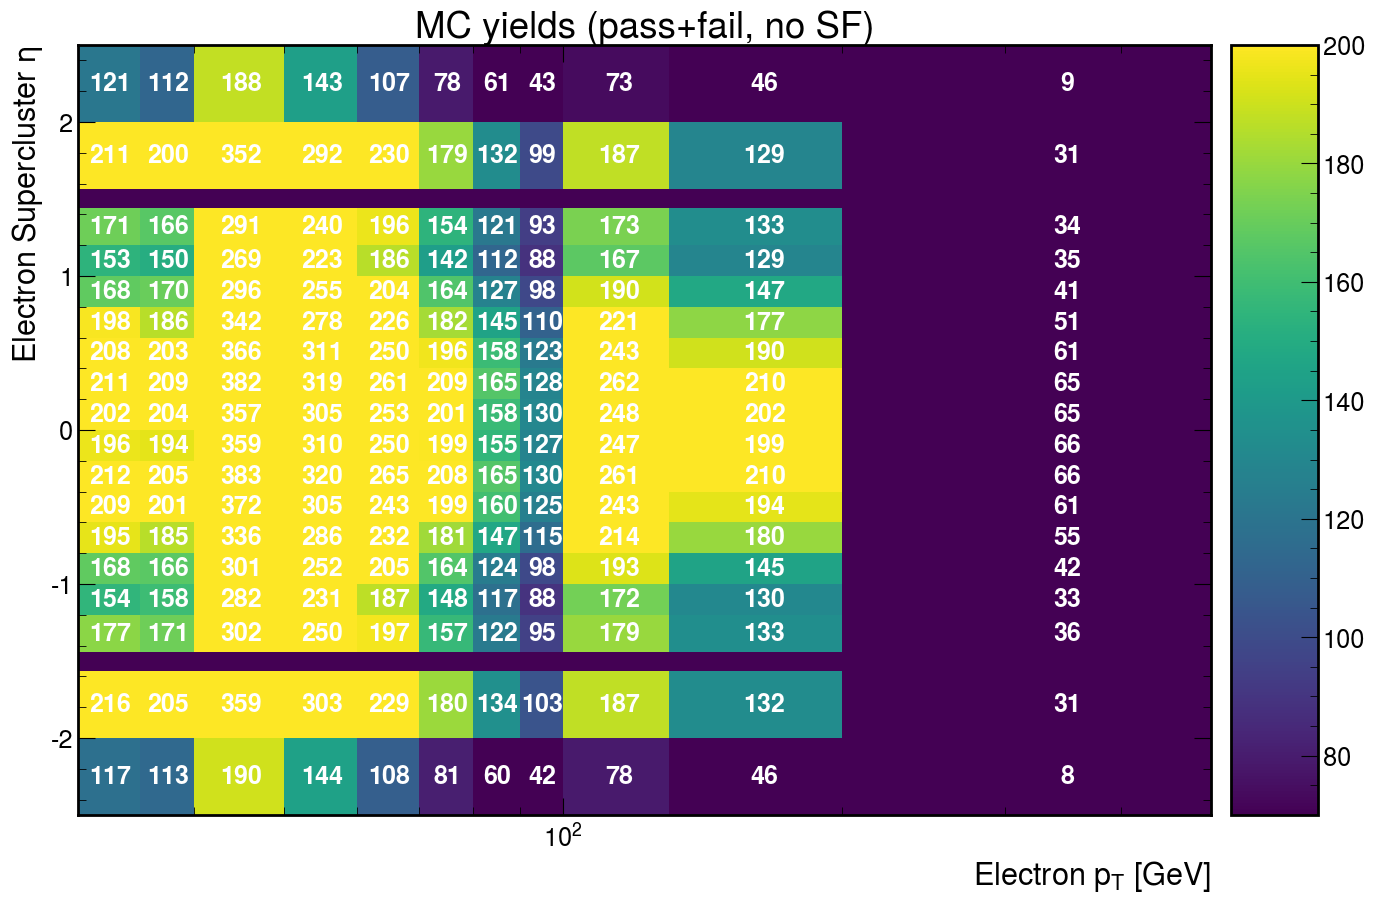

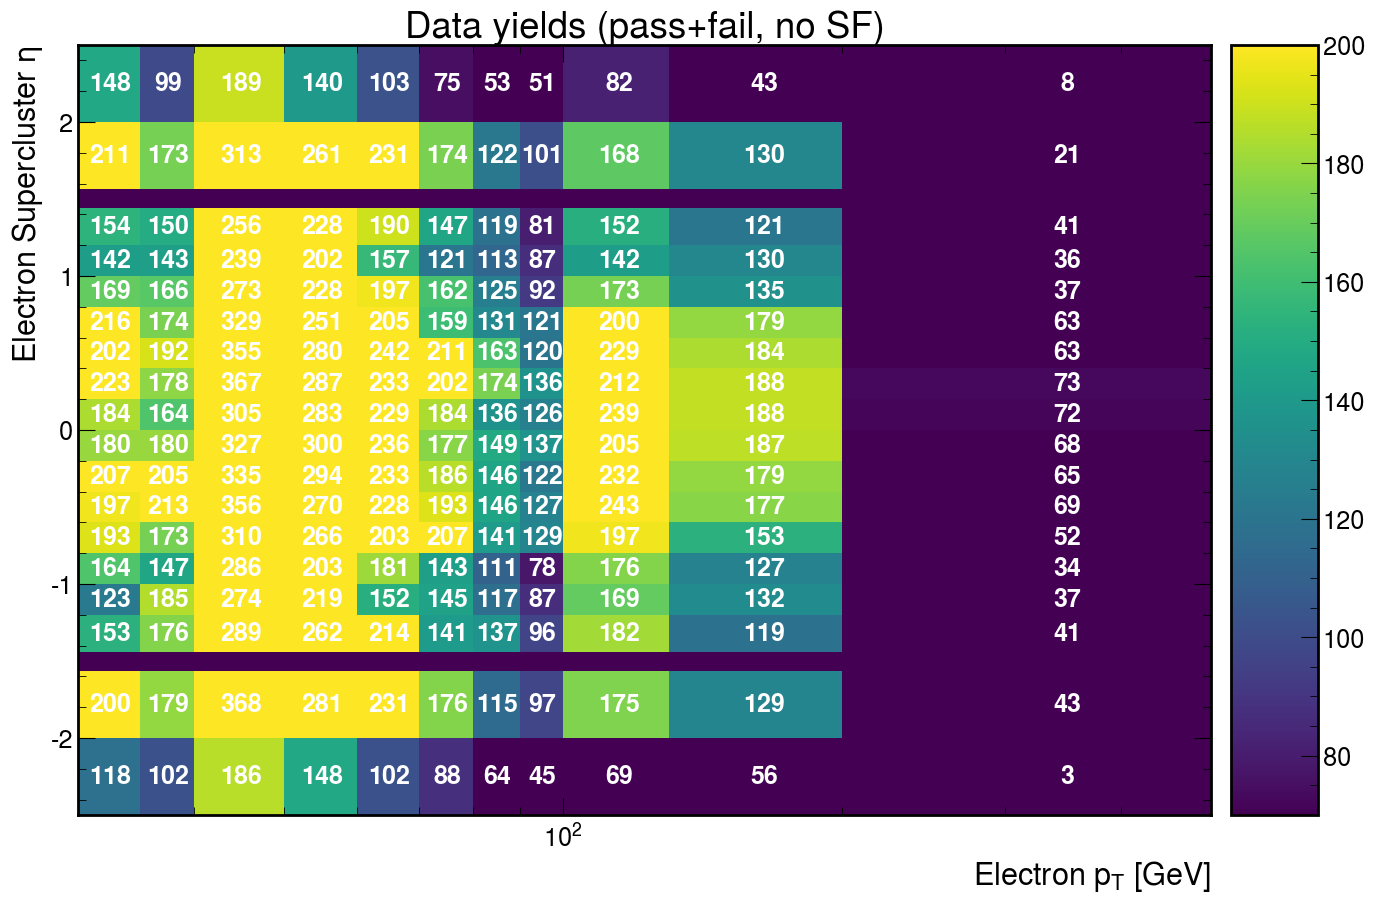

In [8]:
categories = ['mc_passfail', 'data_passfail']
yields = {}
for map2d, title, cat in zip([h_mc_passfail, h_data_passfail], ['MC yields (pass+fail, no SF)', 'Data yields (pass+fail, no SF)'], categories):
    yields[cat] = plot_yields(map2d, title, transpose=transpose)

### Trigger pass, no SF applied
Secondly, we compute the MC and data yields in the pass region, with no SF applied:

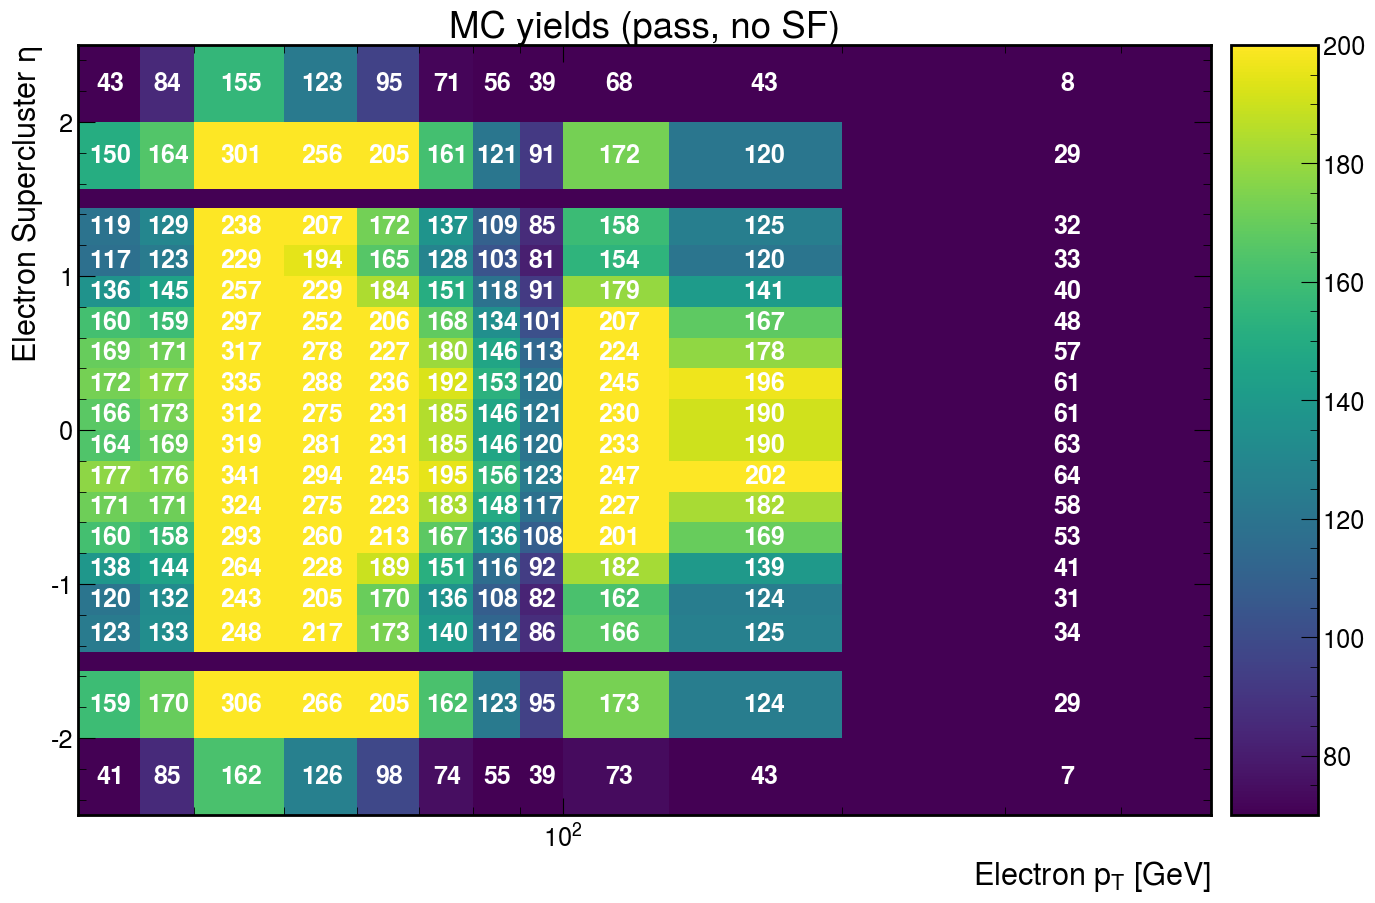

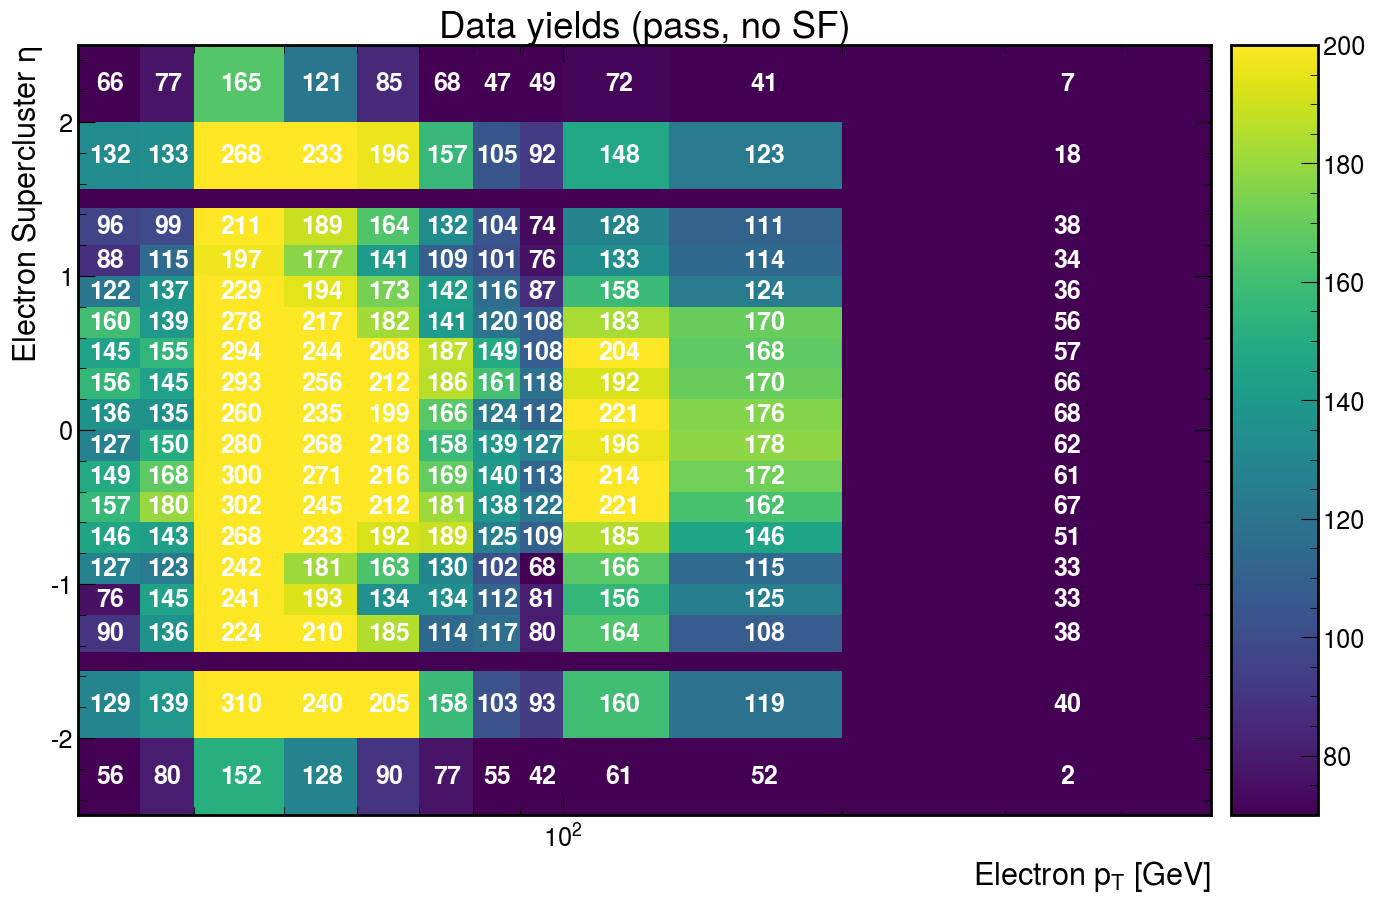

In [9]:
categories = ['mc_pass', 'data_pass']
for map2d, title, cat in zip([h_mc, h_data], ['MC yields (pass, no SF)', 'Data yields (pass, no SF)'], categories):
    yields[cat] = plot_yields(map2d, title, transpose=transpose)

### Compute $\mathcal{R}$
Then, we compute the multiplicative factor $\mathcal{R}$ by considering the MC and data yields in the pass and fail regions:

/tmp/ipykernel_62030/3377985392.py:69: RuntimeWarning: invalid value encountered in true_divide
  r = np.nan_to_num(num.values() / den.values(), 0)


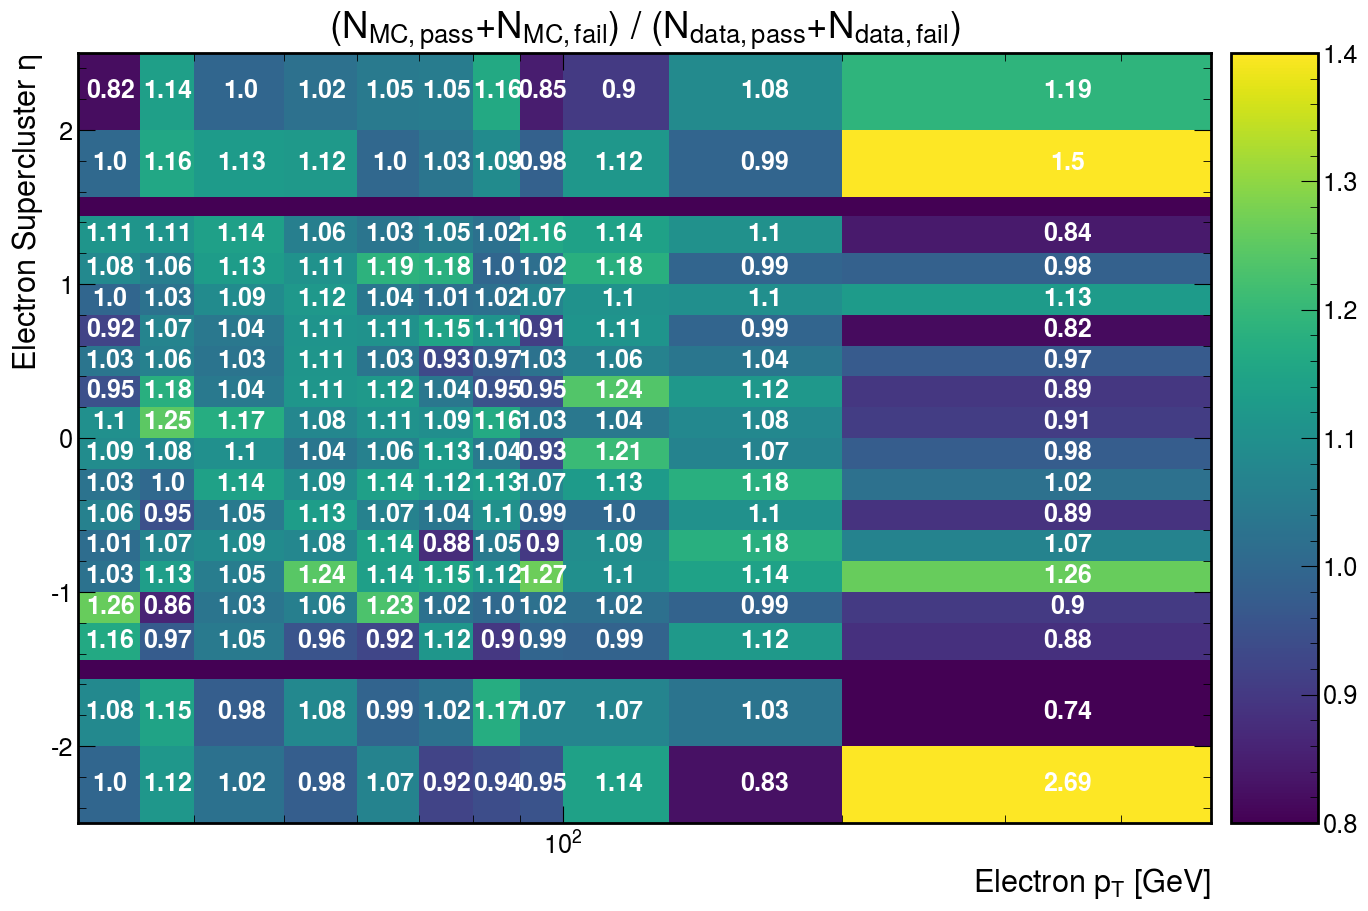

In [10]:
ratio_mc_data_passfail = plot_ratio(h_mc_passfail, h_data_passfail, title="($N_{MC,pass}$+$N_{MC,fail})$ / ($N_{data,pass}$+$N_{data,fail}$)", transpose=transpose)

### Trigger pass, SF applied
We compute the corrected MC yields as defined in (3). As a cross-check, also the data yields are reported in this category despite no difference with the data yields in the uncorrected category is expected:

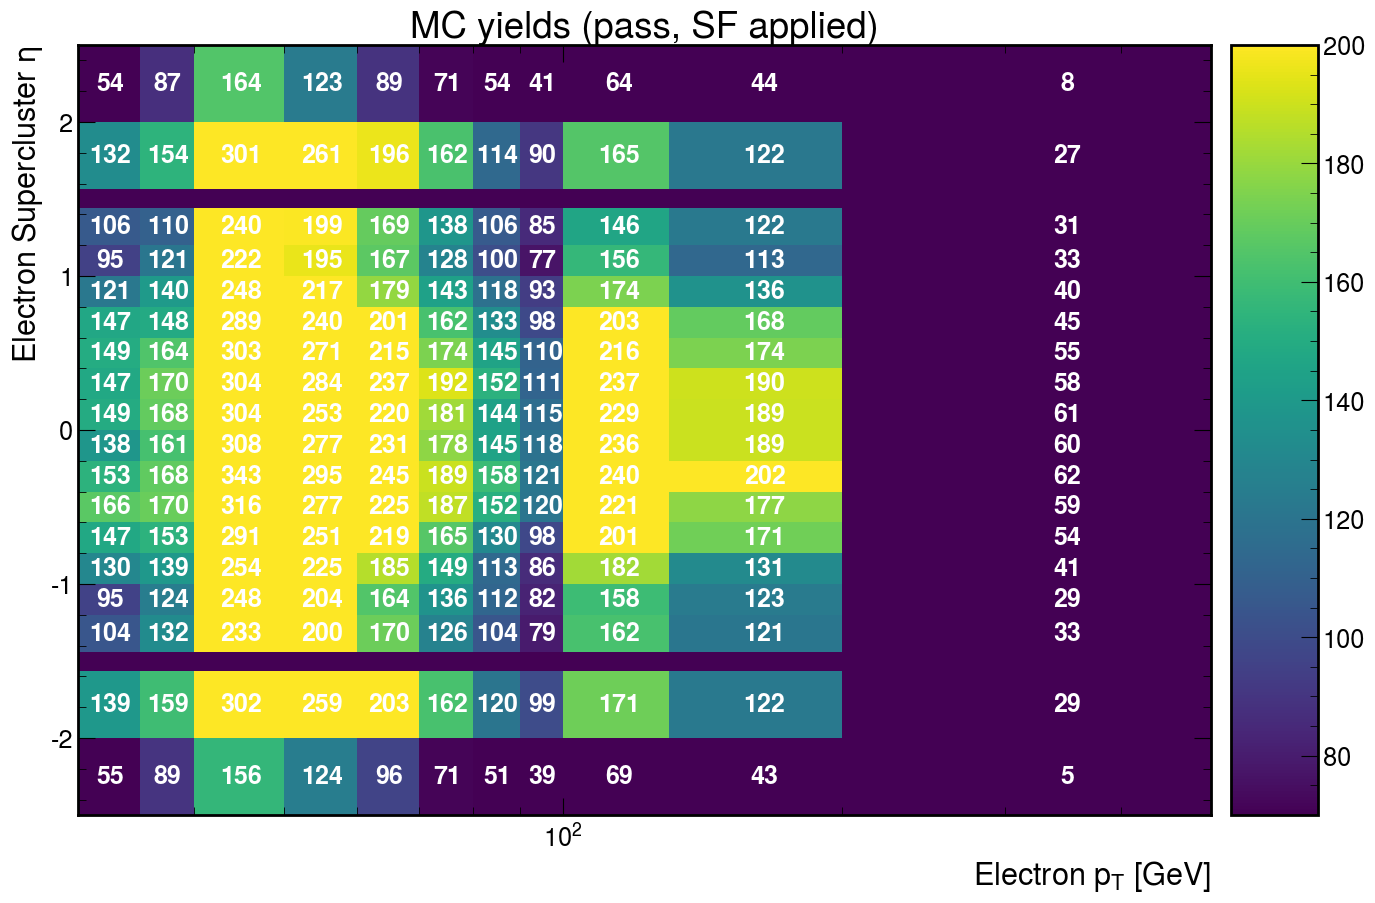

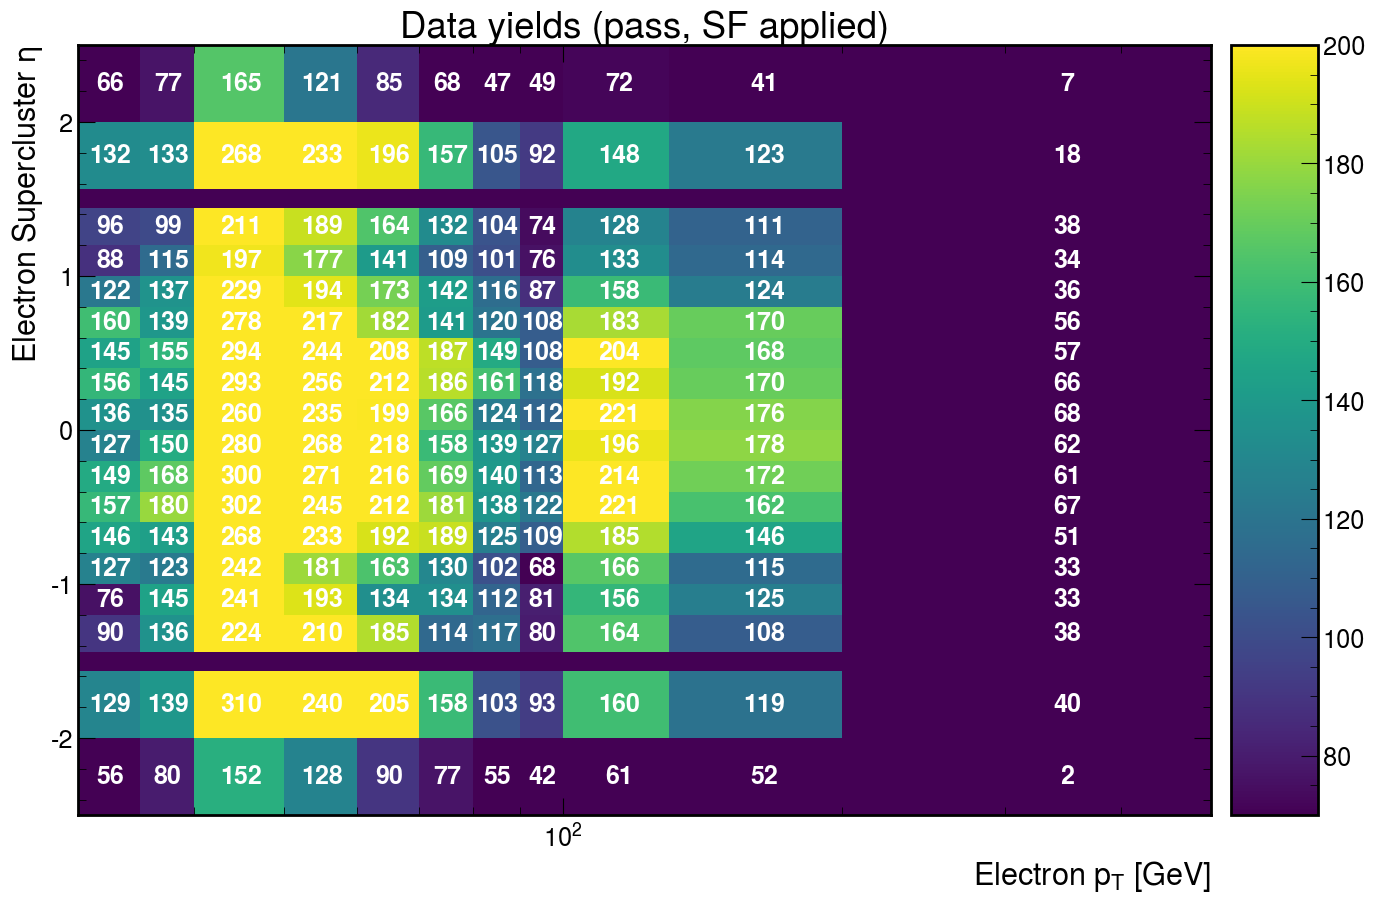

In [11]:
categories = ['mc_pass_sfapplied', 'data_pass_sfapplied']
for map2d, title, cat in zip([h_mc_sfapplied, h_data_sfapplied], ['MC yields (pass, SF applied)', 'Data yields (pass, SF applied)'], categories):
    yields[cat] = plot_yields(map2d, title, transpose=transpose)

In [12]:
yields

{'mc_passfail': Hist(
   Variable([30, 35, 40, 50, 60, 70, 80, 90, 100, 130, 200, 500], name='ElectronGood.pt', label='Electron $p_{T}$ [GeV]'),
   Variable([-2.5, -2, -1.566, -1.4442, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4442, 1.566, 2, 2.5], name='ElectronGood.etaSC', label='Electron Supercluster $\\eta$'),
   storage=Weight()) # Sum: WeightedSum(value=35189.4, variance=1219.66) (WeightedSum(value=35194.7, variance=1219.86) with flow),
 'data_passfail': Hist(
   Variable([30, 35, 40, 50, 60, 70, 80, 90, 100, 130, 200, 500], name='ElectronGood.pt', label='Electron $p_{T}$ [GeV]'),
   Variable([-2.5, -2, -1.566, -1.4442, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4442, 1.566, 2, 2.5], name='ElectronGood.etaSC', label='Electron Supercluster $\\eta$'),
   storage=Weight()) # Sum: WeightedSum(value=33124, variance=33124) (WeightedSum(value=33134, variance=33134) with flow),
 'mc_pass': Hist(
   Variable([30, 35, 40, 50, 60, 70, 80, 90,

### Compute corrected MC yields
Finally, we compute the corrected MC yields as defined in (6), by multiplying the data yields in the pass region by the multiplicative factor $\mathcal{R}$:

In [14]:
#h_mc_calibrated = yields['data_pass']*ratio_mc_data_passfail
#h_mc_calibrated

### Comparison of ratios
We can now compare the ratio of the SF-corrected number of events $N_{MC,pass}$ and $N_{data,pass}$ with the ratio $\mathcal{R}$ as defined in (6):

/tmp/ipykernel_62030/3377985392.py:69: RuntimeWarning: invalid value encountered in true_divide
  r = np.nan_to_num(num.values() / den.values(), 0)


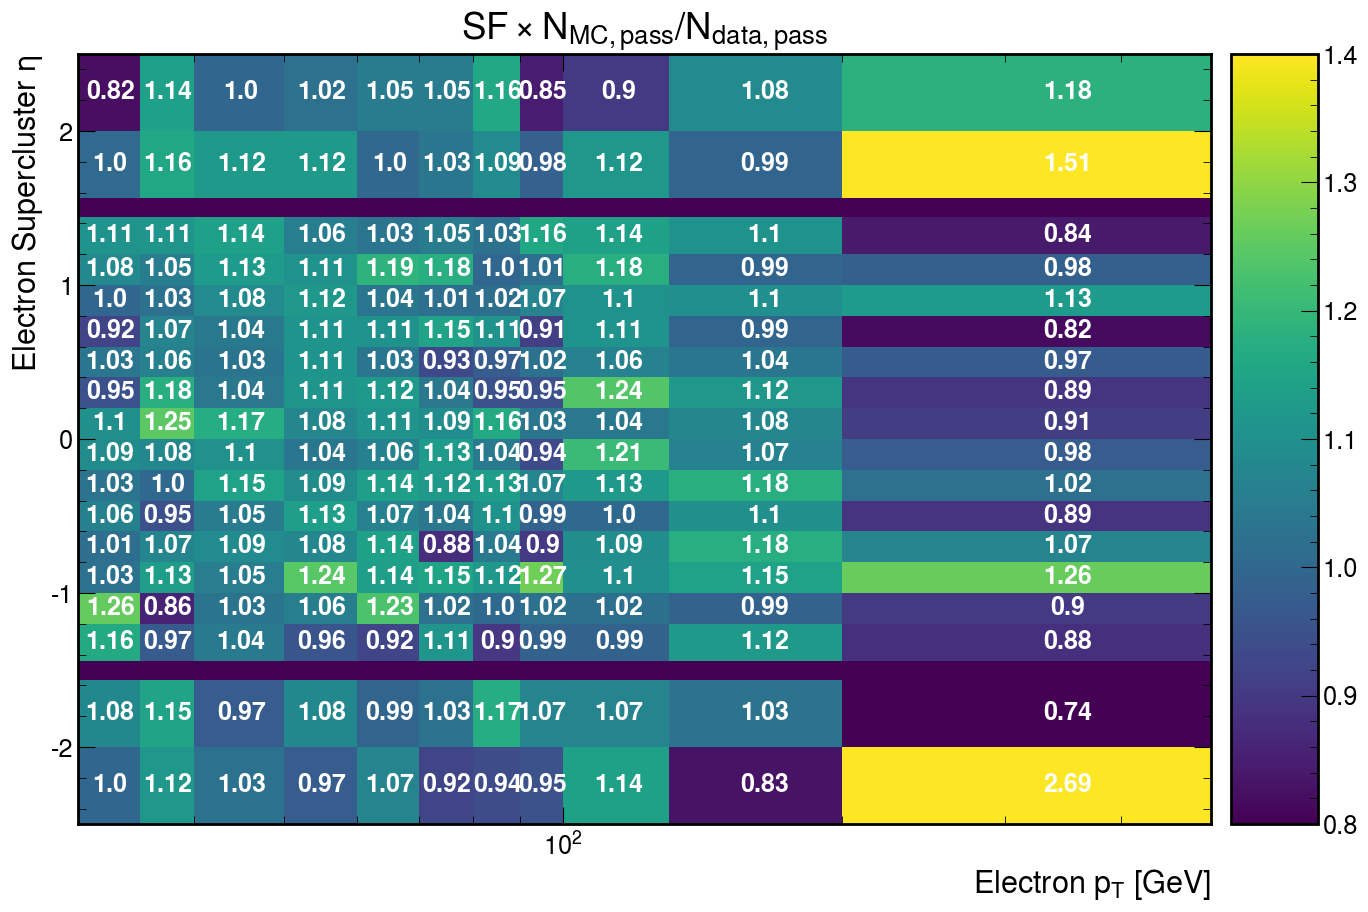

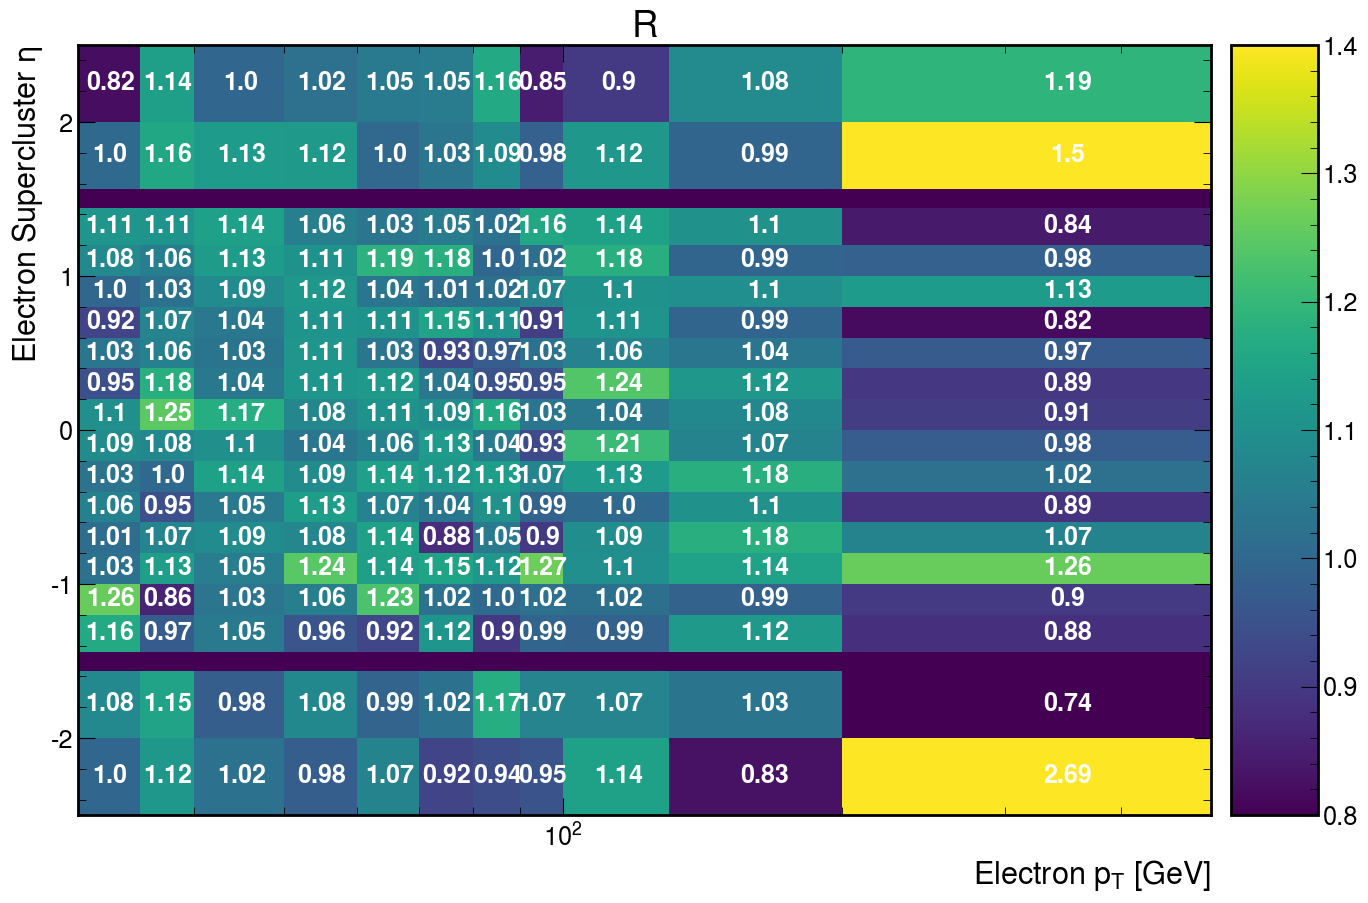

In [15]:
#_h = plot_yields(h_mc_calibrated, "MC yields (pass, calibrated)")
#_h = plot_yields(h_mc_sfapplied, "MC yields (pass, SF applied)", transpose=transpose)
r_calibrated = plot_ratio(h_mc_sfapplied, h_data_sfapplied, "$SF\\times N_{MC,pass}/N_{data,pass}$", transpose=transpose)
r_nominal = plot_ratio(h_mc_passfail, h_data_passfail, "$\mathcal{R}$", transpose=transpose)

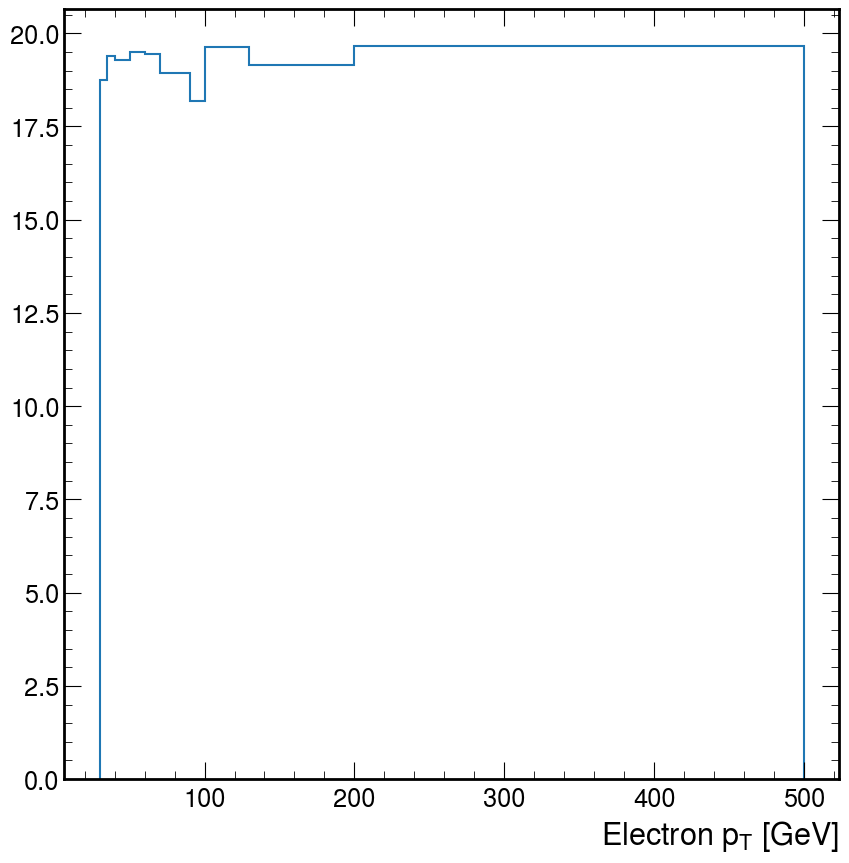

In [18]:
_h[:,sum].plot1d();